In [158]:
import pandas as pd
import scipy.stats as stats
from scipy.stats import beta
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl
from Binomial_Fixed import portfolio_cmds
%matplotlib inline
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
import quandl
apikey = 'J_fXGeVW_zC6RaDeJSQv'
quandl.ApiConfig.api_key = apikey


In [159]:
class Price_DF:
    def __init__(self, asset:str,start_date=None,end_date = None):
        self.asset = asset
        self.start_date = start_date
        self.end_date = end_date

        if self.start_date == None:
            self.start_date = '2018-01-01'
        else:
            self.start_date = start_date
        if self.end_date != None:
            self.end_dte = end_date

        
    def ret_df(self,log_normal=False,to_monthly=False,drop_price_col = False):
        df = quandl.get_table('QUOTEMEDIA/PRICES', ticker = [self.asset],qopts = {"columns": ['date','adj_close']}, date = {'gte':self.start_date,'lte':self.end_date}).set_index('date').sort_index()
        if log_normal:
            df['rets'] = np.log(df['adj_close']/df['adj_close'].shift())
            if to_monthly:
                df = df.resample('m').last()[:-1]
                df['rets'] = np.log(df['adj_close']/df['adj_close'].shift())
        if not log_normal:
            df['rets'] = df['adj_close'].pct_change()
            if to_monthly:
                df = df.resample('m').last()[:-1]
                df['rets'] = df['adj_close'].pct_change()
        if drop_price_col:
            df = df.drop(columns = {'adj_close'})
            df.columns = [f"{self.asset}_rets"]
        if not drop_price_col:
            df.columns = ["Price",f"{self.asset}_rets"]
        
        return df.dropna()

In [160]:
tickers = ['SPY','NVDA','COST','TSLA','HD','XOM','MA']
ret_df = pd.DataFrame(data = None)
lognormal = False
to_monthly = False
drop_price_col = True
start_date = '2018-01-01'

In [161]:
for asset in tickers:
    object = Price_DF(asset = asset,start_date = start_date)
    temp_df = object.ret_df(log_normal=lognormal,to_monthly=to_monthly,drop_price_col=drop_price_col)
    ret_df = pd.concat([ret_df,temp_df],axis=1)

<AxesSubplot:title={'center':'Growth of 1 Dollar since 2018-01-01'}, xlabel='date'>

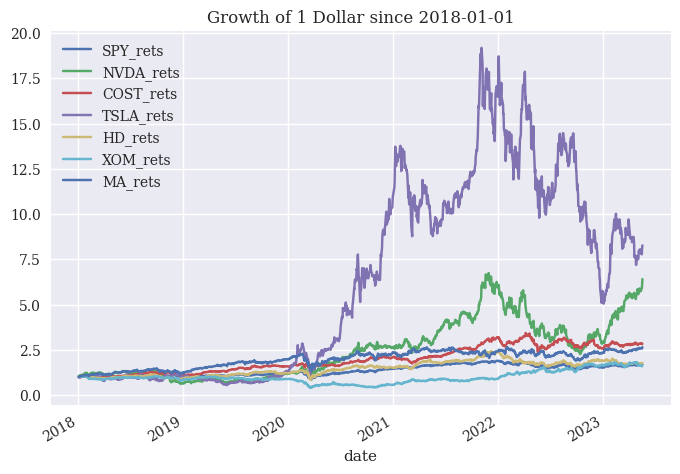

In [162]:
((1+ret_df).cumprod()).plot(title=f'Growth of 1 Dollar since {start_date}')

MIN Correlation pair is ('TSLA_rets', 'XOM_rets')
MAX Correlation pair is ('MA_rets', 'SPY_rets')


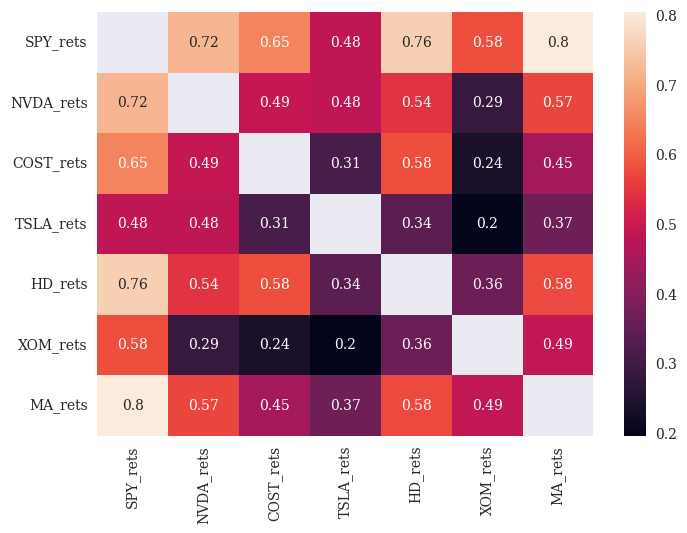

In [163]:
portfolio_cmds.display_correlation(ret_df)

In [164]:
ols_df = portfolio_cmds.get_ols_metrics(regressors=ret_df.iloc[:,0],targets=ret_df.iloc[:,1:],annualization=365)


|           |     $\alpha_{i}$ |   $\beta_{i,spy}$ |   r-squared |   Treynor Ratio |   Info Ratio |
|:----------|----------:|-----------:|------------:|----------------:|-------------:|
| NVDA_rets | 0.386779  |   1.76091  |    0.519615 |        0.395436 |     0.896409 |
| COST_rets | 0.194122  |   0.739105 |    0.421812 |        0.438433 |     0.880296 |
| TSLA_rets | 0.617293  |   1.48804  |    0.232536 |        0.590625 |     0.896041 |
| HD_rets   | 0.0356425 |   1.02048  |    0.575282 |        0.210716 |     0.15951  |
| XOM_rets  | 0.0542095 |   0.918562 |    0.336359 |        0.234804 |     0.164868 |
| MA_rets   | 0.122974  |   1.22922  |    0.646828 |        0.275831 |     0.531277 |




- Nividia earns $38.67\%$ return in excess of the market. Its beta coefficient is large. If the market declines by $1\%$, then the expected return for Nividia on that particular day is $-1.76\%$.



|           |     $\mu_{i}$ |      $\sigma_{i}$ |   Sharpe |       Min |       Max |
|:----------|---------:|---------:|---------:|----------:|----------:|
| SPY_rets  | 0.175789 | 0.254838 | 0.689805 | -0.109424 | 0.0906033 |
| NVDA_rets | 0.696328 | 0.622533 | 1.11854  | -0.187559 | 0.171564  |
| COST_rets | 0.324048 | 0.290009 | 1.11737  | -0.124513 | 0.0995945 |
| TSLA_rets | 0.878873 | 0.786383 | 1.11761  | -0.210628 | 0.198949  |
| HD_rets   | 0.215032 | 0.34287  | 0.627152 | -0.197938 | 0.137508  |
| XOM_rets  | 0.215682 | 0.403619 | 0.534371 | -0.122248 | 0.126868  |
| MA_rets   | 0.339056 | 0.389492 | 0.870509 | -0.127255 | 0.166109  |





|           |   Max Drawdown | Peak                | Bottom              | Recover             | Duration (to Recover)   |
|:----------|---------------:|:--------------------|:--------------------|:--------------------|:------------------------|
| SPY_rets  |      -0.336999 | 2020-02-19 00:00:00 | 2020-03-23 00:00:00 | 2020-08-10 00:00:00 | 173 days 00:00:00       |
| NVDA_rets |      -0.663352 | 2021-11-29 00:00:00 | 2022-10-14 00:00:00 | NaT                 | NaT                     |
| COST_rets |      -0.314042 | 2022-04-07 00:00:00 | 2022-05-20 00:00:00 | NaT                 | NaT                     |
| TSLA_rets |      -0.736322 | 2021-11-04 00:00:00 | 2023-01-03 00:00:00 | NaT                 | NaT                     |
| HD_rets   |      -0.379718 | 2020-02-20 00:00:00 | 2020-03-20 00:00:00 | 2020-05-18 00:00:00 | 88 days 00:00:00        |
| XOM_rets  |      -0.609936 | 2018-09-24 00:00:00 | 2020-03-23 00:00:00 | 2022-01-11 00:00:00 | 1205 days 00:00:00      |
| MA_rets   |      -0.409972 | 2020-02-19 00:00:00 | 2020-03-23 00:00:00 | 2020-08-24 00:00:00 | 187 days 00:00:00       |

In [165]:
portfolio_cmds.tailMetrics(returns=ret_df)

,Skewness,Kurtosis,VaR (0.05),CVaR (0.05),Max Drawdown,Peak,Bottom,Recover,Duration (to Recover)
SPY_rets,-0.519693,10.498791,-0.020501,-0.032694,-0.336999,2020-02-19,2020-03-23,2020-08-10,173 days
NVDA_rets,-0.166157,3.124234,-0.049924,-0.072944,-0.663352,2021-11-29,2022-10-14,NaT,NaT
COST_rets,-0.183400,8.512073,-0.021769,-0.034541,-0.314042,2022-04-07,2022-05-20,NaT,NaT
TSLA_rets,0.179972,3.376619,-0.063206,-0.090557,-0.736322,2021-11-04,2023-01-03,NaT,NaT
HD_rets,-0.994406,17.117933,-0.025269,-0.042548,-0.379718,2020-02-20,2020-03-20,2020-05-18,88 days
XOM_rets,0.043817,4.859421,-0.031473,-0.047577,-0.609936,2018-09-24,2020-03-23,2022-01-11,1205 days
MA_rets,0.328850,7.805150,-0.031655,-0.046673,-0.409972,2020-02-19,2020-03-23,2020-08-24,187 days


|           |   tangency weights |
|:----------|-------------------:|
| SPY_rets  |          -9.91899  |
| NVDA_rets |           1.50003  |
| COST_rets |           3.78646  |
| TSLA_rets |           0.911277 |
| HD_rets   |           0.603612 |
| XOM_rets  |           1.62024  |
| MA_rets   |           2.49736  |

In [168]:
tick = ['SPY', 'TWLO','PTLO']
rt_df = pd.DataFrame(data =None)
st_time = '2015-01-01'
for asset in tick:
    object = Price_DF(asset = asset,start_date = st_time)
    temp_df = object.ret_df(log_normal=lognormal,to_monthly=to_monthly,drop_price_col=drop_price_col)
    rt_df = pd.concat([rt_df,temp_df],axis=1)
    


<AxesSubplot:title={'center':'Growth of $1 dollar since 2015-01-01'}, xlabel='date'>

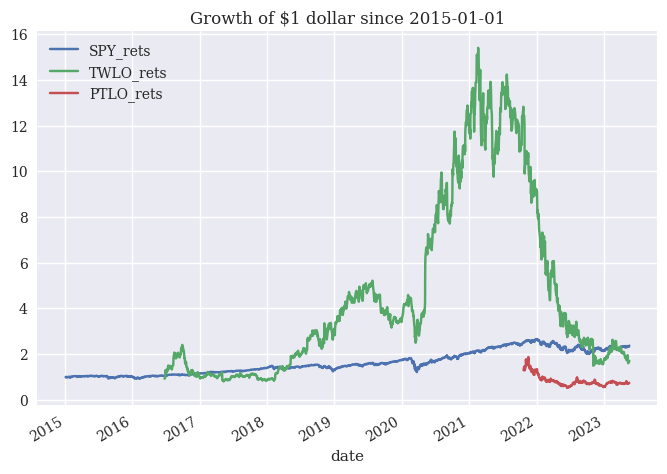

In [178]:
((1+rt_df).cumprod()).plot(title = f"Growth of $1 dollar since {st_time}")

MIN Correlation pair is ('SPY_rets', 'TWLO_rets')
MAX Correlation pair is ('PTLO_rets', 'SPY_rets')


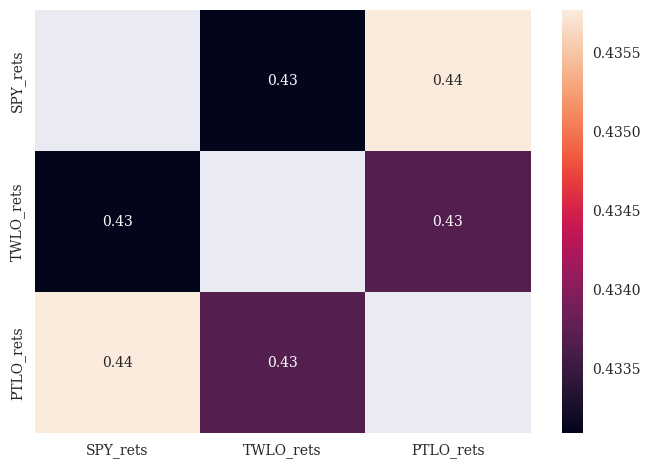

In [174]:
portfolio_cmds.display_correlation(rt_df)

|           |     alpha |   SPY_rets |   r-squared |   Treynor Ratio |   Info Ratio |
|:----------|----------:|-----------:|------------:|----------------:|-------------:|
| TWLO_rets | 0.12446   |    1.45933 |    0.187564 |       0.280784  |    0.178135  |
| PTLO_rets | 0.0646066 |    1.37841 |    0.189894 |       0.0252753 |    0.0882409 |

In [175]:
portfolio_cmds.tailMetrics(returns=rt_df)

,Skewness,Kurtosis,VaR (0.05),CVaR (0.05),Max Drawdown,Peak,Bottom,Recover,Duration (to Recover)
SPY_rets,-0.540731,12.337513,-0.017729,-0.028631,-0.336999,2020-02-19,2020-03-23,2020-08-10,173 days
TWLO_rets,0.668329,13.885420,-0.060529,-0.084487,-0.903628,2021-02-18,2022-11-04,NaT,NaT
PTLO_rets,0.976350,5.948271,-0.066596,-0.083948,-0.723718,2021-11-17,2022-06-16,NaT,NaT


|           |      Mean |      Vol |    Sharpe |       Min |       Max |
|:----------|----------:|---------:|----------:|----------:|----------:|
| SPY_rets  | 0.173884  | 0.222537 | 0.78137   | -0.109424 | 0.0906033 |
| TWLO_rets | 0.409755  | 0.775152 | 0.528613  | -0.346083 | 0.39616   |
| PTLO_rets | 0.0348397 | 0.81346  | 0.0428291 | -0.129571 | 0.286254  |

|           |   tangency weights |
|:----------|-------------------:|
| SPY_rets  |           1.97935  |
| TWLO_rets |          -1.41956  |
| PTLO_rets |           0.440208 |

|           |   Max Drawdown | Peak                | Bottom              | Recover             | Duration (to Recover)   |
|:----------|---------------:|:--------------------|:--------------------|:--------------------|:------------------------|
| SPY_rets  |      -0.336999 | 2020-02-19 00:00:00 | 2020-03-23 00:00:00 | 2020-08-10 00:00:00 | 173 days 00:00:00       |
| TWLO_rets |      -0.903628 | 2021-02-18 00:00:00 | 2022-11-04 00:00:00 | NaT                 | NaT                     |
| PTLO_rets |      -0.723718 | 2021-11-17 00:00:00 | 2022-06-16 00:00:00 | NaT                 | NaT                     |